In [1]:
import numpy as np
import scipy as sp
import upsilon
import matplotlib.pyplot as plt
import glob
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
import csv
import pandas as pd

-------------------------------
* WARNING: No pyFFTW detected *
-------------------------------


In [2]:
test1= fits.open(r'C:\Users\rodri\Documents\Thesis\Lightcurves_FITS\hlsp_k2sff_k2_lightcurve_246906509-c13_kepler_v1_llc.fits')
test1.info()

Filename: C:\Users\rodri\Documents\Thesis\Lightcurves_FITS\hlsp_k2sff_k2_lightcurve_246906509-c13_kepler_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  BESTAPER      1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  2  CIRC_APER0    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  3  CIRC_APER1    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  4  CIRC_APER2    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  5  CIRC_APER3    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  6  CIRC_APER4    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  7  CIRC_APER5    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  8  CIRC_APER6    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
  9  CIRC_APER7    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   
 10  CIRC_APER8    1 BinTableHDU    242   3605R x 6C   [D, D, D, D, I, J]   


In [3]:
print(test1[1].columns)

ColDefs(
    name = 'T'; format = 'D'
    name = 'FRAW'; format = 'D'
    name = 'FCOR'; format = 'D'
    name = 'ARCLENGTH'; format = 'D'
    name = 'MOVING'; format = 'I'
    name = 'CADENCENO'; format = 'J'
)


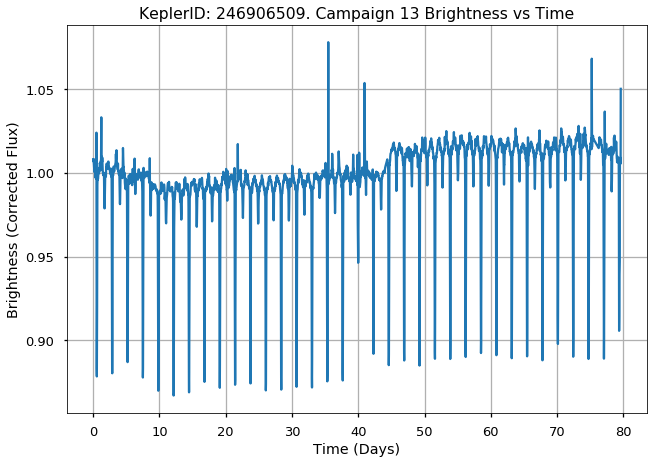

In [10]:
star1data = Table(test1[1].data)
days = star1data['T'] - 2988.52
with plt.style.context('seaborn-talk'):
    lum = plt.plot(days, star1data['FCOR'])
    plt.xlabel('Time (Days)')
    plt.ylabel('Brightness (Corrected Flux)')
    plt.title('KeplerID: 246906509. Campaign 13 Brightness vs Time')
    plt.grid(True)
    plt.savefig("test.png")
    plt.show()

In [5]:
data = pd.read_csv(r"C:\Users\rodri\Downloads\data.csv")
data.head()

,id,label,probability,flag,amplitude,cusum,eta,hl_amp_ratio,kurtosis,n_points,...,quartile31,r21,r31,shapiro_w,skewness,slope_per10,slope_per90,stetson_k,weighted_mean,weighted_std
0,246847532,NonVar,0.36,0,3.926,0.431,0.093,0.558,-0.146,3604,...,0.076,0.459,0.100,0.926,-0.108,-0.001,0.000,0.820,1.033,0.042
1,246847562,NonVar,0.51,0,0.005,0.369,0.153,0.699,-0.163,3605,...,0.003,0.516,0.085,0.983,-0.202,-0.005,0.005,0.780,0.988,0.002
2,246847591,NonVar,0.40,0,0.342,0.447,0.109,2.022,-1.059,3605,...,0.090,0.677,0.259,0.893,0.390,0.000,0.000,0.859,1.032,0.049
3,246848055,NonVar,0.39,0,3.800,0.384,0.338,0.837,62.571,3605,...,0.041,0.458,0.099,0.868,2.806,-0.001,0.001,0.775,1.020,0.026
4,246848344,NonVar,0.36,0,0.966,0.446,0.008,0.397,-1.340,3605,...,0.038,0.467,0.108,0.855,-0.482,-0.002,0.002,0.819,1.011,0.019


In [7]:
label_counts = data['label'].value_counts()
label_counts

DSCT              494
NonVar            336
LPV_OSARG_RGB      68
EB_ED              48
LPV_OSARG_AGB      10
EB_ESD              8
LPV_SRV_AGB_O       7
LPV_Mira_AGB_O      2
EB_EC               2
CEPH_F              1
RRL_c               1
Name: label, dtype: int64

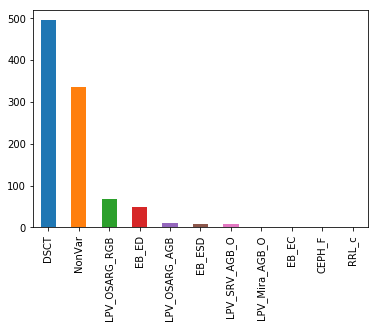

In [8]:
label_counts.plot(kind='bar')

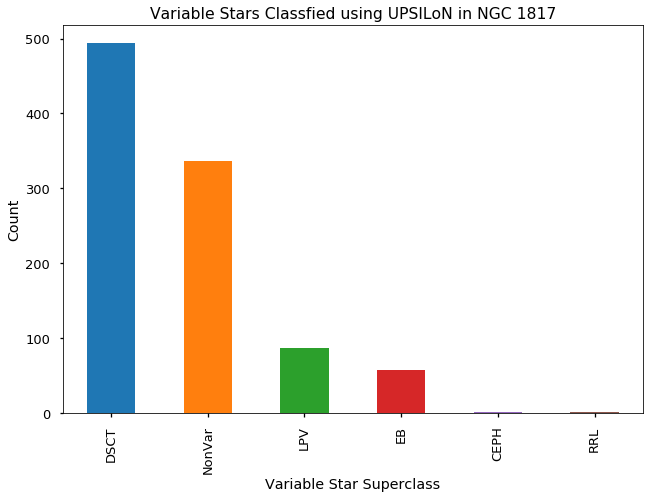

In [9]:
superclass = data['label']
f = lambda x: x["label"].split("_", )
superclass = pd.DataFrame(data.apply(f, axis=1).tolist())
data["superclass"] = superclass[0]
slabel_counts = data['superclass'].value_counts()
with plt.style.context('seaborn-talk'):
    slabel_counts.plot(kind='bar')
    plt.xlabel('Variable Star Superclass')
    plt.ylabel('Count')
    plt.title('Variable Stars Classfied using UPSILoN in NGC 1817')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D295C9A400>]],
      dtype=object)

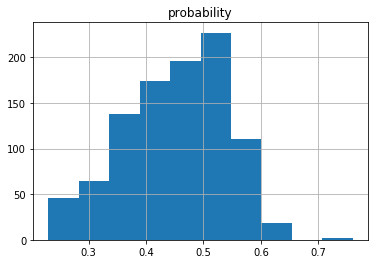

In [27]:
data.hist(column="probability")

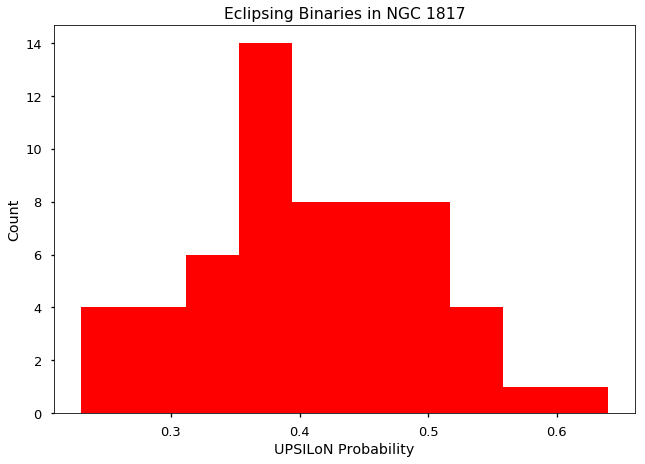

In [26]:
DSCT = data[data['superclass'].str.match('DSCT')]
LPV = data[data['superclass'].str.match('LPV')]
EB = data[data['superclass'].str.match('EB')]

with plt.style.context('seaborn-talk'):
    figure = EB['probability'].plot.hist(histtype="stepfilled", bins=10, color = 'red')
    plt.xlabel('UPSILoN Probability')
    plt.ylabel('Count')
    plt.title('Eclipsing Binaries in NGC 1817')
    plt.show()

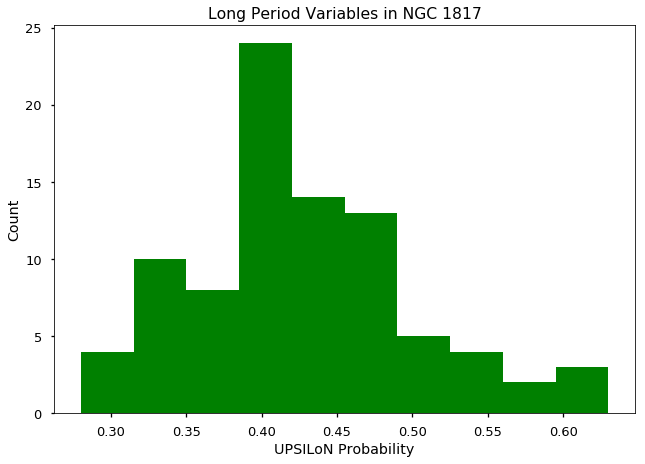

In [25]:
with plt.style.context('seaborn-talk'):
    figure = LPV['probability'].plot.hist(histtype="stepfilled", bins=10, color = 'green')
    plt.xlabel('UPSILoN Probability')
    plt.ylabel('Count')
    plt.title('Long Period Variables in NGC 1817')
    plt.show()

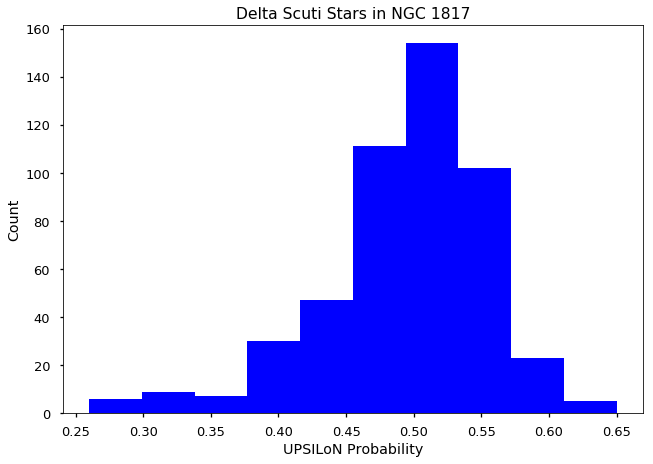

In [24]:
with plt.style.context('seaborn-talk'):
    figure = DSCT['probability'].plot.hist(histtype="stepfilled", bins=10, color = 'blue')
    plt.xlabel('UPSILoN Probability')
    plt.ylabel('Count')
    plt.title('Delta Scuti Stars in NGC 1817')
    plt.show()

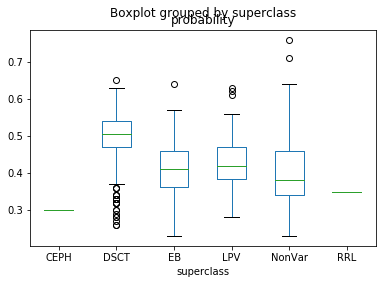

In [32]:
data.boxplot(column="probability", by = "superclass", grid=False)